In [11]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

load_dotenv() 
HOST = os.getenv("HOST")
USER = os.getenv("USER")
PASSWORD = os.getenv("PASSWORD")
DATABASE = os.getenv("DATABASE")

# Connexion 
host = HOST
user = USER
password = PASSWORD
database = DATABASE
port = 3306


In [12]:

# Crée une "engine" SQLAlchemy
engine = create_engine(f"mysql+pymysql://{user}:{password}@{host}:{port}/{database}")

In [17]:
# Lire une table complète
df = pd.read_sql("SELECT * FROM questions", con=engine)

# Afficher les 5 premières lignes
df.head()


,id,title,link,question,tags,author,pub_date
0,1,How to make a left join in an update with sqla...,https://stackoverflow.com/questions/79728678/h...,I am trying to craft a query with SQLAlchemy 2...,"python,mysql,sqlalchemy",edg,2025-08-07 13:47:41
1,2,How to mapping preferred_username of JWT to us...,https://stackoverflow.com/questions/79728675/h...,I'm using Keycloak as Key Manager for WSO2 Api...,"wso2,wso2-api-manager",Tonny Tc,2025-08-07 13:45:42
2,3,How to securely identify the user linking thei...,https://stackoverflow.com/questions/79728670/h...,I'm implementing account linking with OAuth pr...,"authentication,oauth-2.0,oauth,jwt,openid",yorukot,2025-08-07 13:43:30
3,4,Details about Incremental Backup on OCI Volume...,https://stackoverflow.com/questions/79728669/d...,I have an instance running in OCI using a cust...,oracle-cloud-infrastructure,graygoo,2025-08-07 13:43:04
4,5,Bug with Video texture for webgpu,https://stackoverflow.com/questions/79728666/b...,WARN LOGS :\nexamples.html:1 Error while parsi...,webgpu,Nikola Lukic,2025-08-07 13:41:05


## Création d'un nuage de mot

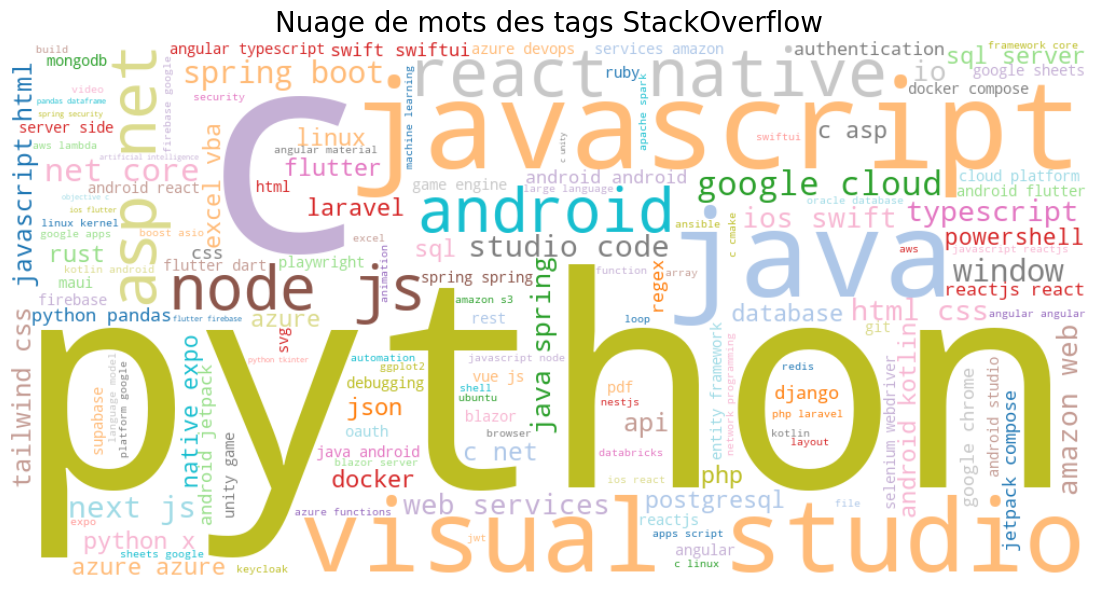

In [14]:
all_tags = []

for tags in df["tags"].dropna():
    tag_list = tags.split(",")
    all_tags.extend(tag.strip() for tag in tag_list)

tags_text = " ".join(all_tags)


wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color="white",
    colormap="tab20",
    max_words=150
).generate(tags_text)


plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Nuage de mots des tags StackOverflow", fontsize=20)
plt.show()